In [30]:
import transforms.backpropable_transforms as bpt

from PIL import Image
import torchvision

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))


# Useful for undoing thetorchvision.transforms.Normalize() 
# From https://discuss.pytorch.org/t/simple-way-to-inverse-transform-normalization/4821
class UnNormalize(object):
    def __init__(self, mean, std):
        self.mean = mean
        self.std = std

    def __call__(self, tensor):
        # The normalize code -> t.sub_(m).div_(s)
        for t, m, s in zip(tensor, self.mean, self.std):
            t.mul_(s).add_(m)
        return tensor


1
resulting image shape = torch.Size([3, 224, 224])


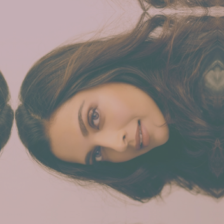

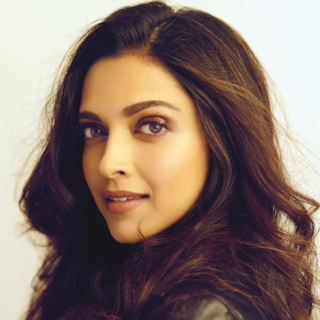

In [31]:
max_offset = 20

from importlib import reload
reload(bpt)
preprocess_transform = torchvision.transforms.Compose([
    torchvision.transforms.Scale(224 - max_offset),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.5, 0.5, 0.5),(0.5, 0.5, 0.5)),
    bpt.BPTransform(max_offset=max_offset)
])

unnormalize = UnNormalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))

img_x = preprocess_transform(Image.open("/accounts/projects/jsteinhardt/sauravkadavath/eot_net/deepika.png").convert('RGB'))
print("resulting image shape =", img_x.shape)
torchvision.utils.save_image(unnormalize(img_x), "/accounts/projects/jsteinhardt/sauravkadavath/eot_net/sample_transformation.png")

from IPython.display import Image as Image_Displayer
display(Image_Displayer(filename="/accounts/projects/jsteinhardt/sauravkadavath/eot_net/sample_transformation.png"))
display(Image_Displayer(filename="/accounts/projects/jsteinhardt/sauravkadavath/eot_net/deepika.png"))
